<h3>Theory<h3>

Hãy xem xét một hình ảnh có giá trị pixel chỉ giới hạn trong một số phạm vi giá trị cụ thể. Đối với ví dụ, hình ảnh sáng hơn sẽ có tất cả các pixel bị giới hạn ở các giá trị cao. Nhưng một hình ảnh tốt sẽ có pixel từ tất cả các vùng của hình ảnh. Vì vậy, bạn cần kéo dài biểu đồ này đến một trong hai kết thúc (như được đưa ra trong hình ảnh dưới đây, từ Wikipedia) và đó là những gì cân bằng biểu đồ làm (bằng từ đơn giản). Điều này thường cải thiện độ tương phản của hình ảnh.

![histogram_equalization](histogram_equalization.PNG)

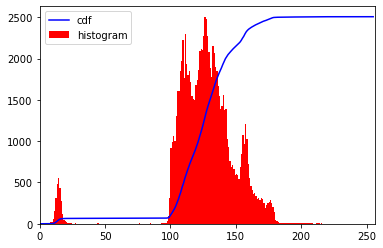

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('xehoi.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

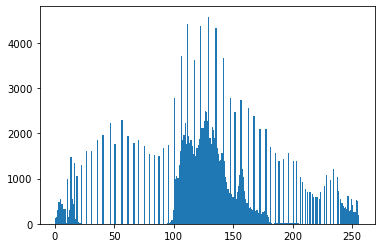

-1

In [12]:
img = cv.imread('xehoi.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.hist(res.ravel(),256,[0,256]); plt.show()
cv.imshow("res",res)
cv.waitKey(0)

Vì vậy, bây giờ bạn có thể chụp các hình ảnh khác nhau với các điều kiện ánh sáng khác nhau, cân bằng nó và kiểm tra kết quả. Cân bằng biểu đồ là tốt khi biểu đồ của hình ảnh được giới hạn trong một khu vực cụ thể. Nó sẽ không hoạt động tốt ở những nơi có các biến thể cường độ lớn trong đó biểu đồ bao gồm một vùng lớn, tức là cả hai pixel sáng và tối.

<h3>CLAHE (Contrast Limited Adaptive Histogram Equalization)<h3>

Trong nhiều trường hợp, cân bằng Histogram toàn cục không tốt.

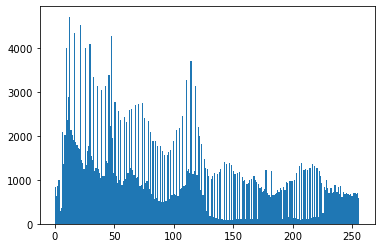

-1

In [14]:
img = cv.imread('tuong.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.hist(res.ravel(),256,[0,256]); plt.show()
cv.imshow("res",res)
cv.waitKey(0)

Để giải quyết vấn đề này, cân bằng biểu đồ thích ứng được sử dụng. Trong đó, hình ảnh được chia thành các khối nhỏ được gọi là "gạch" (gạch là 8x8 theo mặc định trong OpenCV). Sau đó, mỗi khối này là biểu đồ được cân bằng như bình thường. Vì vậy, trong một khu vực nhỏ, biểu đồ sẽ giới hạn trong một khu vực nhỏ (trừ khi có tiếng ồn). Nếu có tiếng ồn, nó sẽ được khuếch đại. Để tránh điều này, giới hạn tương phản được áp dụng. Nếu bất kỳ thùng biểu đồ nào nằm trên giới hạn tương phản được chỉ định (theo mặc định 40 trong OpenCV), các pixel đó được cắt và phân phối đồng đều cho các thùng khác trước khi áp dụng cân bằng biểu đồ. Sau khi cân bằng, để loại bỏ các tạo tác trong đường viền gạch, phép nội suy song tuyến được áp dụng.

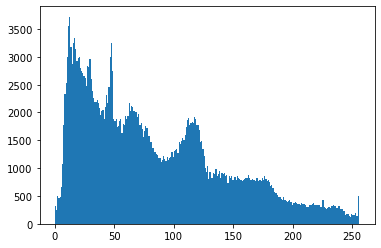

-1

In [16]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
res = np.hstack((img,cl1)) #stacking images side-by-side
plt.hist(res.ravel(),256,[0,256]); plt.show()
cv.imshow("cl1",res)
cv.waitKey(0)